  ##  HR Analytics - Predict Employee Attrition

In [1]:
# Importing  Libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns 
import warnings 
warnings.filterwarnings('ignore') 

 ###  Read Dataset

In [2]:
# Reading the excel file in Data Frame
data=pd.read_csv(r"HR-Employee-Attrition.csv")

In [3]:
data

Age Attrition     BusinessTravel  DailyRate              Department  \
0      41       Yes      Travel_Rarely       1102                   Sales   
1      49        No  Travel_Frequently        279  Research & Development   
2      37       Yes      Travel_Rarely       1373  Research & Development   
3      33        No  Travel_Frequently       1392  Research & Development   
4      27        No      Travel_Rarely        591  Research & Development   
...   ...       ...                ...        ...                     ...   
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education EducationField  EmployeeCount  \
0                    1          2  Life Sciences              1   
1                    8          1  Life Sciences              1   
2                    2          2          Other              1   
3                    3          4  Life Sciences              1   
4                    2          1        Medical              1   
...                ...        ...            ...            ...   
1465                23          2        Medical              1   
1466                 6          1        Medical              1   
1467                 4          3  Life Sciences              1   
1468                 2          3        Medical              1   
1469                 8          3        Medical              1   

      EmployeeNumber  ...  RelationshipSatisfaction StandardHours  \
0                  1  ...                         1            80   
1                  2  ...                         4            80   
2                  4  ...                         2            80   
3                  5  ...                         3            80   
4                  7  ...                         4            80   
...              ...  ...                       ...           ...   
1465            2061  ...                         3            80   
1466            2062  ...                         1            80   
1467            2064  ...                         2            80   
1468            2065  ...                         4            80   
1469            2068  ...                         1            80   

      StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                    0                  8                      0   
1                    1                 10                      3   
2                    0                  7                      3   
3                    0                  8                      3   
4                    1                  6                      3   
...                ...                ...                    ...   
1465                 1                 17                      3   
1466                 1                  9                      5   
1467                 1                  6                      0   
1468                 0                 17                      3   
1469                 0                  6                      3   

     WorkLifeBalance  YearsAtCompany YearsInCurrentRole  \
0                  1               6                  4   
1                  3              10                  7   
2                  3               0                  0   
3                  3               8                  7   
4                  3               2                  2   
...              ...             ...                ...   
1465               3               5                  2   
1466               3               7                  7   
1467               3               6                  2   
1468               2               9    

## BASIC CHECKS

In [4]:
data.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  

[5 rows x 35 columns]

In [5]:
data.tail()

Age Attrition     BusinessTravel  DailyRate              Department  \
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education EducationField  EmployeeCount  \
1465                23          2        Medical              1   
1466                 6          1        Medical              1   
1467                 4          3  Life Sciences              1   
1468                 2          3        Medical              1   
1469                 8          3        Medical              1   

      EmployeeNumber  ...  RelationshipSatisfaction StandardHours  \
1465            2061  ...                         3            80   
1466            2062  ...                         1            80   
1467            2064  ...                         2            80   
1468            2065  ...                         4            80   
1469            2068  ...                         1            80   

      StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
1465                 1                 17                      3   
1466                 1                  9                      5   
1467                 1                  6                      0   
1468                 0                 17                      3   
1469                 0                  6                      3   

     WorkLifeBalance  YearsAtCompany YearsInCurrentRole  \
1465               3               5                  2   
1466               3               7                  7   
1467               3               6                  2   
1468               2               9                  6   
1469               4               4                  3   

      YearsSinceLastPromotion  YearsWithCurrManager  
1465                        0                     3  
1466                        1                     7  
1467                        0                     3  
1468                        0                     8  
1469                        1                     2  

[5 rows x 35 columns]

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [7]:
data.shape

(1470, 35)

In [8]:
data.describe().T

count          mean          std     min      25%  \
Age                       1470.0     36.923810     9.135373    18.0    30.00   
DailyRate                 1470.0    802.485714   403.509100   102.0   465.00   
DistanceFromHome          1470.0      9.192517     8.106864     1.0     2.00   
Education                 1470.0      2.912925     1.024165     1.0     2.00   
EmployeeCount             1470.0      1.000000     0.000000     1.0     1.00   
EmployeeNumber            1470.0   1024.865306   602.024335     1.0   491.25   
EnvironmentSatisfaction   1470.0      2.721769     1.093082     1.0     2.00   
HourlyRate                1470.0     65.891156    20.329428    30.0    48.00   
JobInvolvement            1470.0      2.729932     0.711561     1.0     2.00   
JobLevel                  1470.0      2.063946     1.106940     1.0     1.00   
JobSatisfaction           1470.0      2.728571     1.102846     1.0     2.00   
MonthlyIncome             1470.0   6502.931293  4707.956783  1009.0  2911.00   
MonthlyRate               1470.0  14313.103401  7117.786044  2094.0  8047.00   
NumCompaniesWorked        1470.0      2.693197     2.498009     0.0     1.00   
PercentSalaryHike         1470.0     15.209524     3.659938    11.0    12.00   
PerformanceRating         1470.0      3.153741     0.360824     3.0     3.00   
RelationshipSatisfaction  1470.0      2.712245     1.081209     1.0     2.00   
StandardHours             1470.0     80.000000     0.000000    80.0    80.00   
StockOptionLevel          1470.0      0.793878     0.852077     0.0     0.00   
TotalWorkingYears         1470.0     11.279592     7.780782     0.0     6.00   
TrainingTimesLastYear     1470.0      2.799320     1.289271     0.0     2.00   
WorkLifeBalance           1470.0      2.761224     0.706476     1.0     2.00   
YearsAtCompany            1470.0      7.008163     6.126525     0.0     3.00   
YearsInCurrentRole        1470.0      4.229252     3.623137     0.0     2.00   
YearsSinceLastPromotion   1470.0      2.187755     3.222430     0.0     0.00   
YearsWithCurrManager      1470.0      4.123129     3.568136     0.0     2.00   

                              50%       75%      max  
Age                          36.0     43.00     60.0  
DailyRate                   802.0   1157.00   1499.0  
DistanceFromHome              7.0     14.00     29.0  
Education                     3.0      4.00      5.0  
EmployeeCount                 1.0      1.00      1.0  
EmployeeNumber             1020.5   1555.75   2068.0  
EnvironmentSatisfaction       3.0      4.00      4.0  
HourlyRate                   66.0     83.75    100.0  
JobInvolvement                3.0      3.00      4.0  
JobLevel                      2.0      3.00      5.0  
JobSatisfaction               3.0      4.00      4.0  
MonthlyIncome              4919.0   8379.00  19999.0  
MonthlyRate               14235.5  20461.50  26999.0  
NumCompaniesWorked            2.0      4.00      9.0  
PercentSalaryHike            14.0     18.00     25.0  
PerformanceRating             3.0      3.00      4.0  
RelationshipSatisfaction      3.0      4.00      4.0  
StandardHours                80.0     80.00     80.0  
StockOptionLevel              1.0      1.00      3.0  
TotalWorkingYears            10.0     15.00     40.0  
TrainingTimesLastYear         3.0      3.00      6.0  
WorkLifeBalance               3.0      3.00      4.0  
YearsAtCompany                5.0      9.00     40.0  
YearsInCurrentRole            3.0      7.00     18.0  
YearsSinceLastPromotion       1.0      3.00     15.0  
YearsWithCurrManager          3.0      7.00     17.0

In [9]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [10]:
# target
data["Attrition"].value_counts()

Attrition
No     1233
Yes     237
Name: count, dtype: int64

In [11]:
# Get the summary statistics for categorical variables
data.describe(include='O')

Attrition BusinessTravel              Department EducationField Gender  \
count       1470           1470                    1470           1470   1470   
unique         2              3                       3              6      2   
top           No  Travel_Rarely  Research & Development  Life Sciences   Male   
freq        1233           1043                     961            606    882   

                JobRole MaritalStatus Over18 OverTime  
count              1470          1470   1470     1470  
unique                9             3      1        2  
top     Sales Executive       Married      Y       No  
freq                326           673   1470     1054

## Checking the missing value

In [12]:
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

- The dataset contains no null or missing records.

# Exploratory Data Analysis (EDA)

# Univariate  

- Analysing the single variable /columns and features
- Check the distribution  of each columns

In [13]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [14]:
new_data=data[['Age', 'Attrition', 'BusinessTravel','DistanceFromHome','EnvironmentSatisfaction','JobInvolvement','JobSatisfaction',
'MonthlyIncome','NumCompaniesWorked','OverTime', 'TotalWorkingYears','WorkLifeBalance','YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion']]

In [15]:
new_data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DistanceFromHome',
       'EnvironmentSatisfaction', 'JobInvolvement', 'JobSatisfaction',
       'MonthlyIncome', 'NumCompaniesWorked', 'OverTime', 'TotalWorkingYears',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion'],
      dtype='object')

## AGE

<Axes: xlabel='Age', ylabel='Count'>

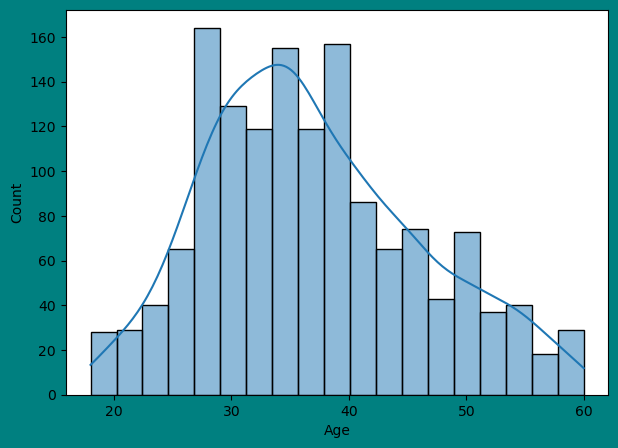

In [16]:
#Age
plt.figure(figsize=(7,5),facecolor="#008080")
sns.histplot(x=data.Age,kde=True)

- The data is approximately normal
- Ages between 28 and 35 have the highest count, with peaks around 30–32

## Attrition

<Axes: xlabel='Attrition', ylabel='Count'>

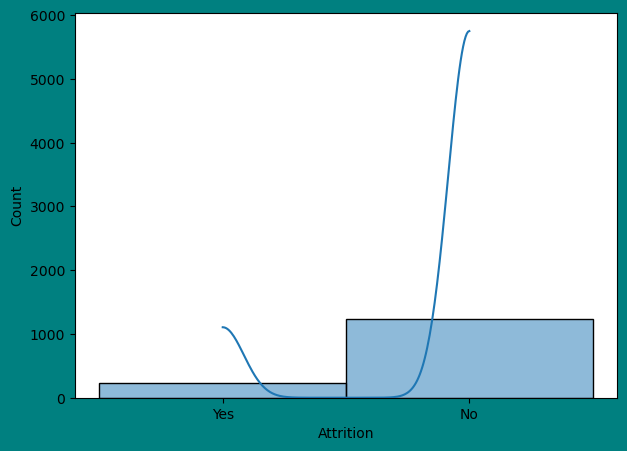

In [17]:
#Attrition
plt.figure(figsize=(7,5),facecolor="#008080")
sns.histplot(x=data.Attrition,kde=True)

- A majority of employees have not left the company (Attrition = No).
- A much smaller group has left (Attrition = Yes).


## BusinessTravel

<Axes: xlabel='BusinessTravel', ylabel='Count'>

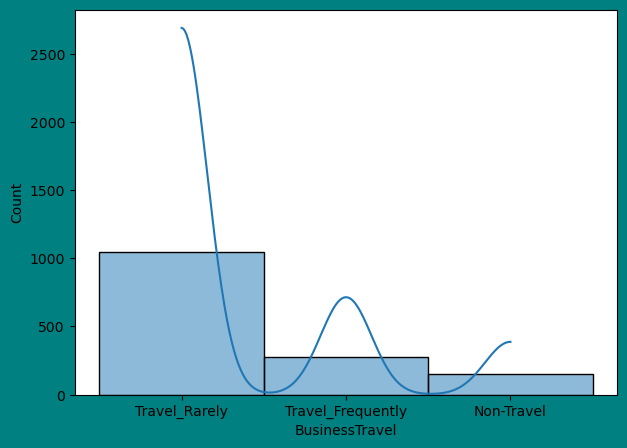

In [18]:
#BusinessTravel
plt.figure(figsize=(7,5),facecolor="#008080")
sns.histplot(x=data.BusinessTravel,kde=True)

- The most of employee have jobs with minimal travel requirement

## DistanceFromHome

<Axes: xlabel='DistanceFromHome', ylabel='Count'>

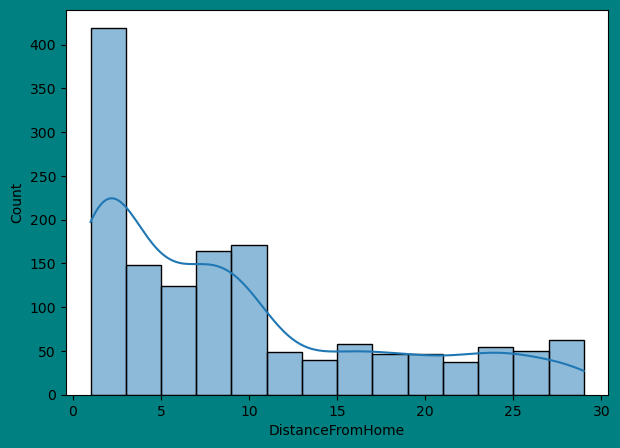

In [19]:
#'DistanceFromHome'
plt.figure(figsize=(7,5),facecolor="#008080")
sns.histplot(x=data.DistanceFromHome,kde=True)

- The highest concentration of employee live within 0-5 from work place
-  Fewer employee are commuting longer distance (15-30)

## EnvironmentSatisfaction

<Axes: xlabel='EnvironmentSatisfaction', ylabel='Count'>

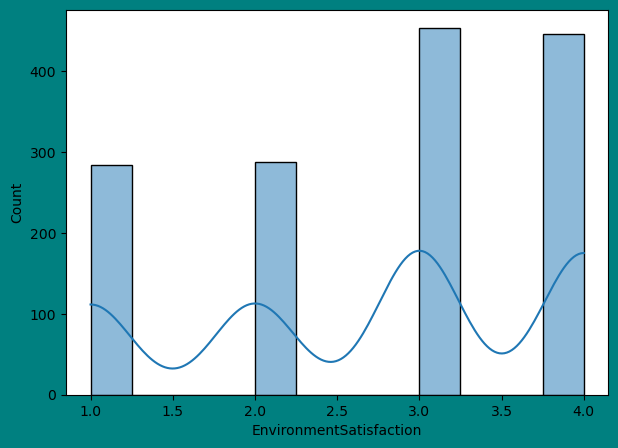

In [20]:
#EnvironmentSatisfaction
plt.figure(figsize=(7,5),facecolor="#008080")
sns.histplot(x=data.EnvironmentSatisfaction,kde=True)

- The majority of employee rate their environment satisfation as 3 high or 4 (very high)


## JobInvolvement

<Axes: xlabel='JobInvolvement', ylabel='Count'>

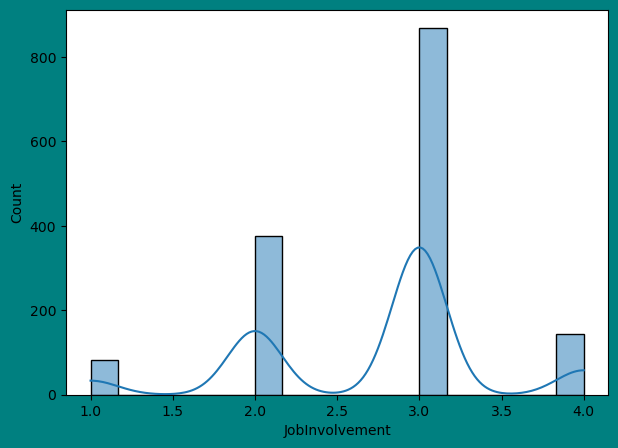

In [21]:
# JobInvolvement 
plt.figure(figsize=(7,5),facecolor="#008080")
sns.histplot(x=data.JobInvolvement,kde=True)

- The majority of employees rate their job involvement as high , indicating strong engagement and effective contribution to their roles

## JobSatisfaction

<Axes: xlabel='JobSatisfaction', ylabel='Count'>

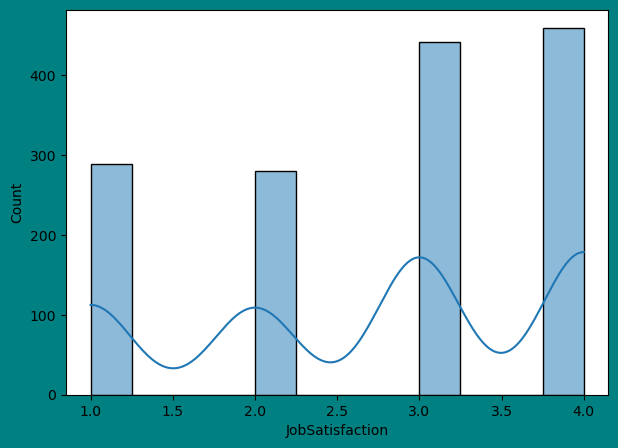

In [22]:
# JobSatisfaction
plt.figure(figsize=(7,5),facecolor="#008080")
sns.histplot(x=data.JobSatisfaction,kde=True)

- The distribution shows that most employees report high job satisfaction, indicating a generally positive work environment.

## MonthlyIncome

<Axes: xlabel='MonthlyIncome', ylabel='Count'>

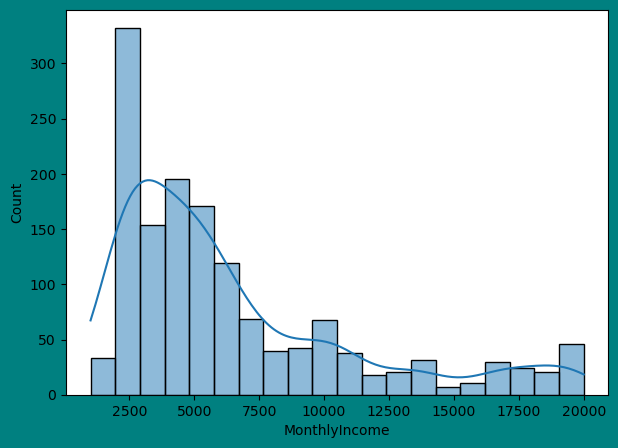

In [23]:
# MonthlyIncome
plt.figure(figsize=(7,5),facecolor="#008080")
sns.histplot(x=data.MonthlyIncome,kde=True)

- Most employees earn between $2,000 and $6,000 per month, while only a few earn very high salaries above $10,000.


## NumCompaniesWorked

<Axes: xlabel='NumCompaniesWorked', ylabel='Count'>

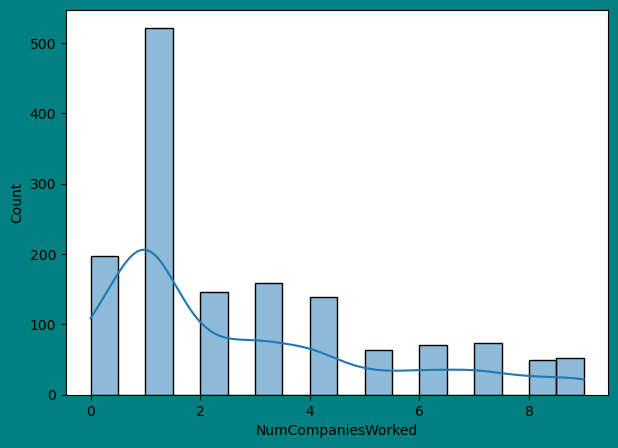

In [24]:
# NumCompaniesWorked
plt.figure(figsize=(7,5),facecolor="#008080")
sns.histplot(x=data.NumCompaniesWorked,kde=True)

- Most employees have worked at only one or two companies, suggesting a relatively stable job history for many.

## OverTime

<Axes: xlabel='OverTime', ylabel='Count'>

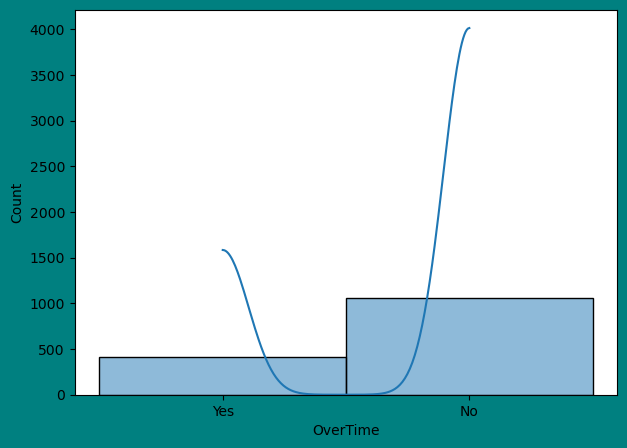

In [25]:
# OverTime
plt.figure(figsize=(7,5),facecolor="#008080")
sns.histplot(x=data.OverTime,kde=True)

- This chart shows that a significantly higher number of employees do not work overtime

## TotalWorkingYears

<Axes: xlabel='TotalWorkingYears', ylabel='Count'>

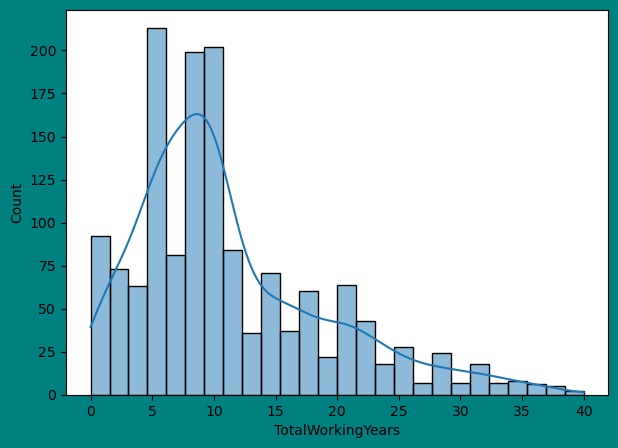

In [26]:
# TotalWorkingYears
plt.figure(figsize=(7,5),facecolor="#008080")
sns.histplot(x=data.TotalWorkingYears,kde=True)

- The most employees have between 5 to 10 years of total work experience

## WorkLifeBalance

<Axes: xlabel='WorkLifeBalance', ylabel='Count'>

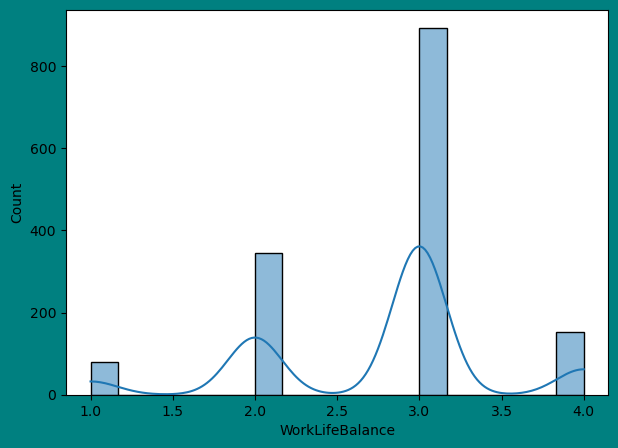

In [27]:
# WorkLifeBalance
plt.figure(figsize=(7,5),facecolor="#008080")
sns.histplot(x=data.WorkLifeBalance,kde=True)

- The most employees rated their work-life balance as 3.

## YearsAtCompany

<Axes: xlabel='YearsAtCompany', ylabel='Count'>

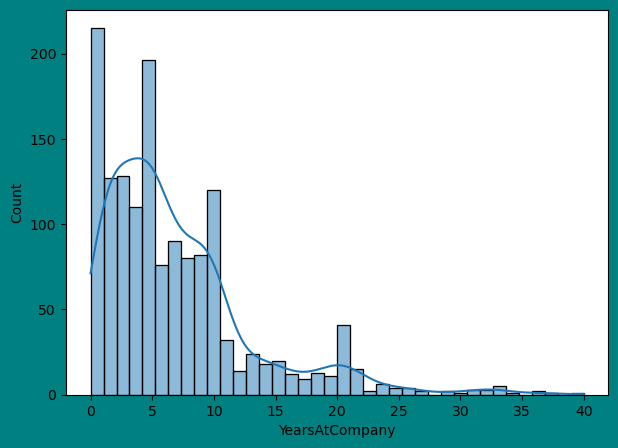

In [28]:
#YearsAtCompany
plt.figure(figsize=(7,5),facecolor="#008080")
sns.histplot(x=data.YearsAtCompany,kde=True)

- Most employees have worked at the company for less than 10 years, which means the staff is fairly new or has short job experience at this company.

## YearsInCurrentRole

<Axes: xlabel='YearsInCurrentRole', ylabel='Count'>

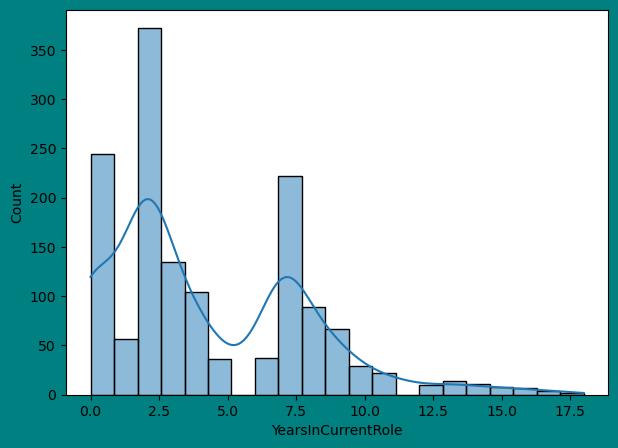

In [29]:
# YearsInCurrentRole
plt.figure(figsize=(7,5),facecolor="#008080")
sns.histplot(x=data.YearsInCurrentRole,kde=True)

- Most employees have been in their current role for 2 to 4 years

## Years SinceLast Promotion

<Axes: xlabel='YearsSinceLastPromotion', ylabel='Count'>

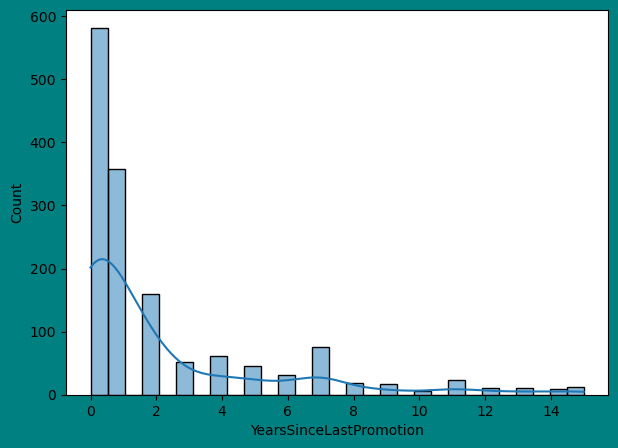

In [30]:
# YearsSinceLastPromotion
plt.figure(figsize=(7,5),facecolor="#008080")
sns.histplot(x=data.YearsSinceLastPromotion,kde=True)

- Most employees have been promoted within the last 1 to 2 years, suggesting recent opportunities for career growth.

## EducationField

<Axes: xlabel='EducationField', ylabel='Count'>

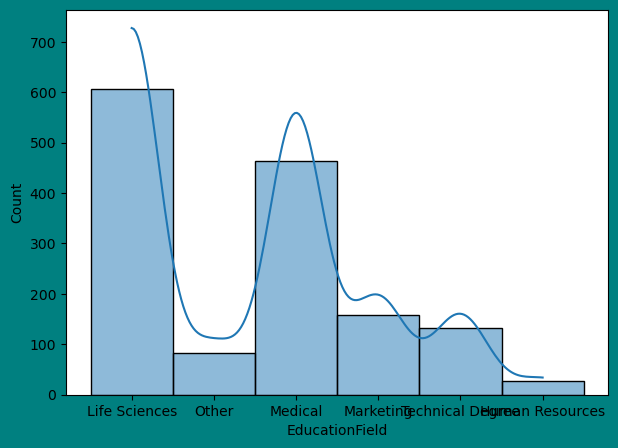

In [31]:
# EducationField
plt.figure(figsize=(7,5),facecolor="#008080")
sns.histplot(x=data.EducationField,kde=True)

- Most people come from Life Sciences and Medical fields. Fewer people studied Marketing, Technical Degrees, and very few are from Human Resources or other fields.

 ### BIVARIATE ANALYSIS 
  - It refers to plots between input variables and target variable.

In [32]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

## BusinessTravel and Attrition

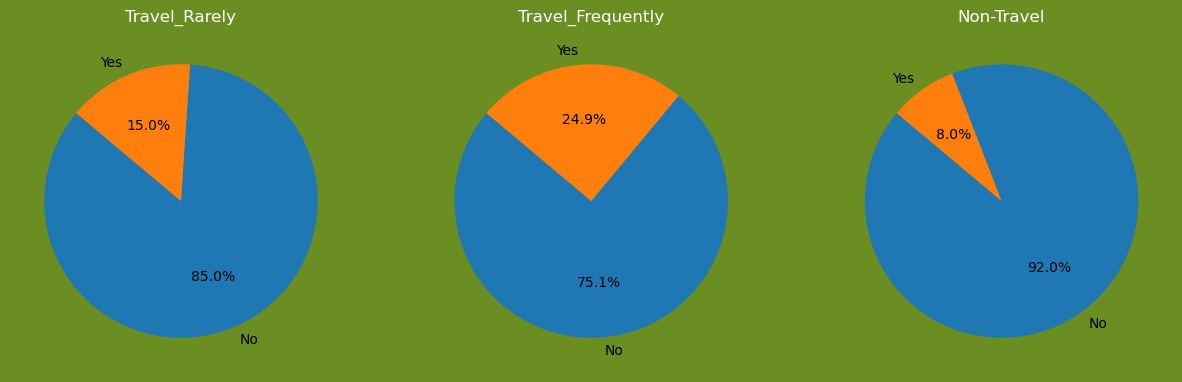

In [33]:
import matplotlib.pyplot as plt
travel_types = data['BusinessTravel'].unique()
plt.figure(figsize=(15, 5), facecolor="#6B8E23")
for i, travel in enumerate(travel_types):
    plt.subplot(1, len(travel_types), i+1)
 
    subset = data[data['BusinessTravel'] == travel]
   
    counts = subset['Attrition'].value_counts()
   
    plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140)
    plt.title(travel, color='white')
plt.show()


- Travel Frequently – 24.9% left Highest attrition, likely due to stress from frequent travel.

- Travel Rarely – 15.0% left oderate attrition, more stable than frequent travelers.

- Non-Travel – 8.0% left Lowest attrition, likely due to better work-life balance.

### Department and attrition

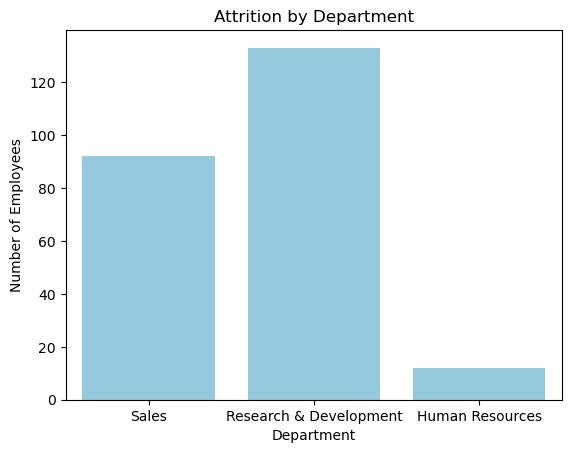

In [34]:
##  Department and attrition
filtered_df = data[data['Attrition'] == 'Yes']
sns.countplot(data=filtered_df, x='Department', color='skyblue')
plt.title('Attrition by Department')
plt.xlabel('Department')
plt.ylabel('Number of Employees')
plt.show()


- The Research & Development department has the highest number of employees who left.
- The Sales department also shows a significant number of attritions


## Jobrole and Attrition

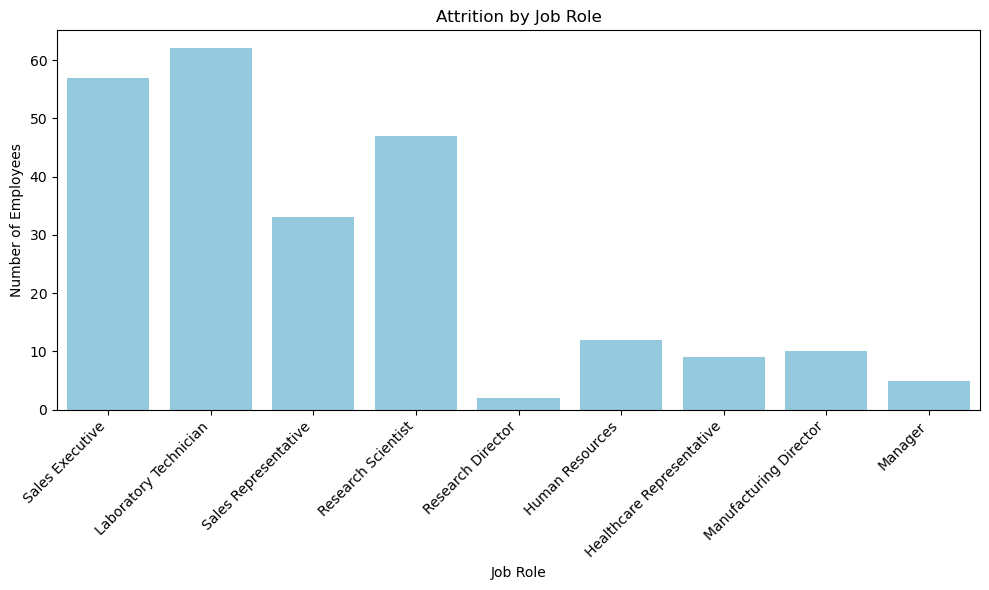

In [35]:
## Jobrole and Attrition
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=filtered_df, x='JobRole', color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.title('Attrition by Job Role')
plt.xlabel('Job Role')
plt.ylabel('Number of Employees')
plt.tight_layout()
plt.show()



-  Laboratory Technicians and Sales Executives have the most employees leaving.
- Research Scientists and Sales Representatives also see notable attrition.
- Research Directors, Managers, and Manufacturing Directors have very few leaving.

### Gender and attrition

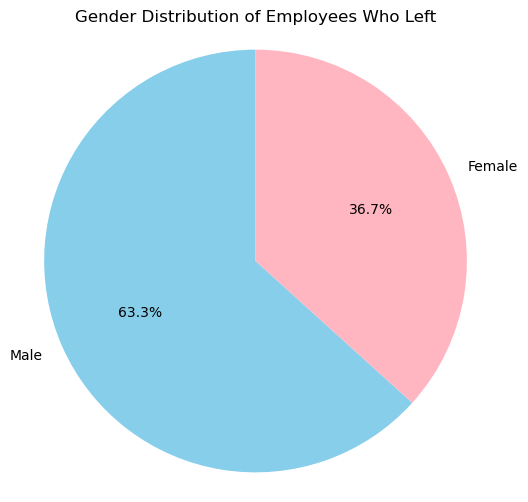

In [36]:
left_df = data[data['Attrition'] == 'Yes']
gender_counts = left_df['Gender'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=['#87CEEB', '#FFB6C1'])
plt.title('Gender Distribution of Employees Who Left')
plt.axis('equal') 
plt.show()


- 63.3% of the employees who left were maleand 36.7% were female.
- This indicates that more males left the organization compared to females.

###  JobRole and MonthlyIncome

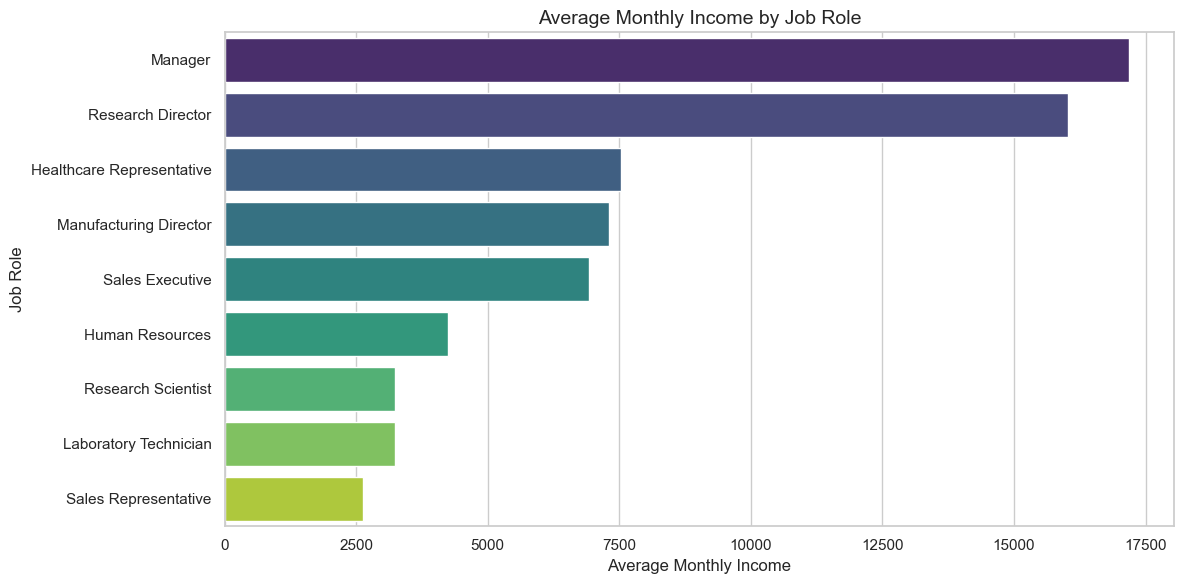

In [37]:
job = data.groupby("JobRole")["MonthlyIncome"].mean().sort_values(ascending=False)
sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.barplot(x=job.values, y=job.index, palette="viridis")
plt.title("Average Monthly Income by Job Role", fontsize=14)
plt.xlabel("Average Monthly Income")
plt.ylabel("Job Role")
plt.tight_layout()
plt.show()


- Manager – highest average monthly income, nearing $17,500.

- Research Director – second highest, slightly below the Manager role.

- Healthcare Representative – surprisingly high compared to technical roles.

## MULTIVARIANCE

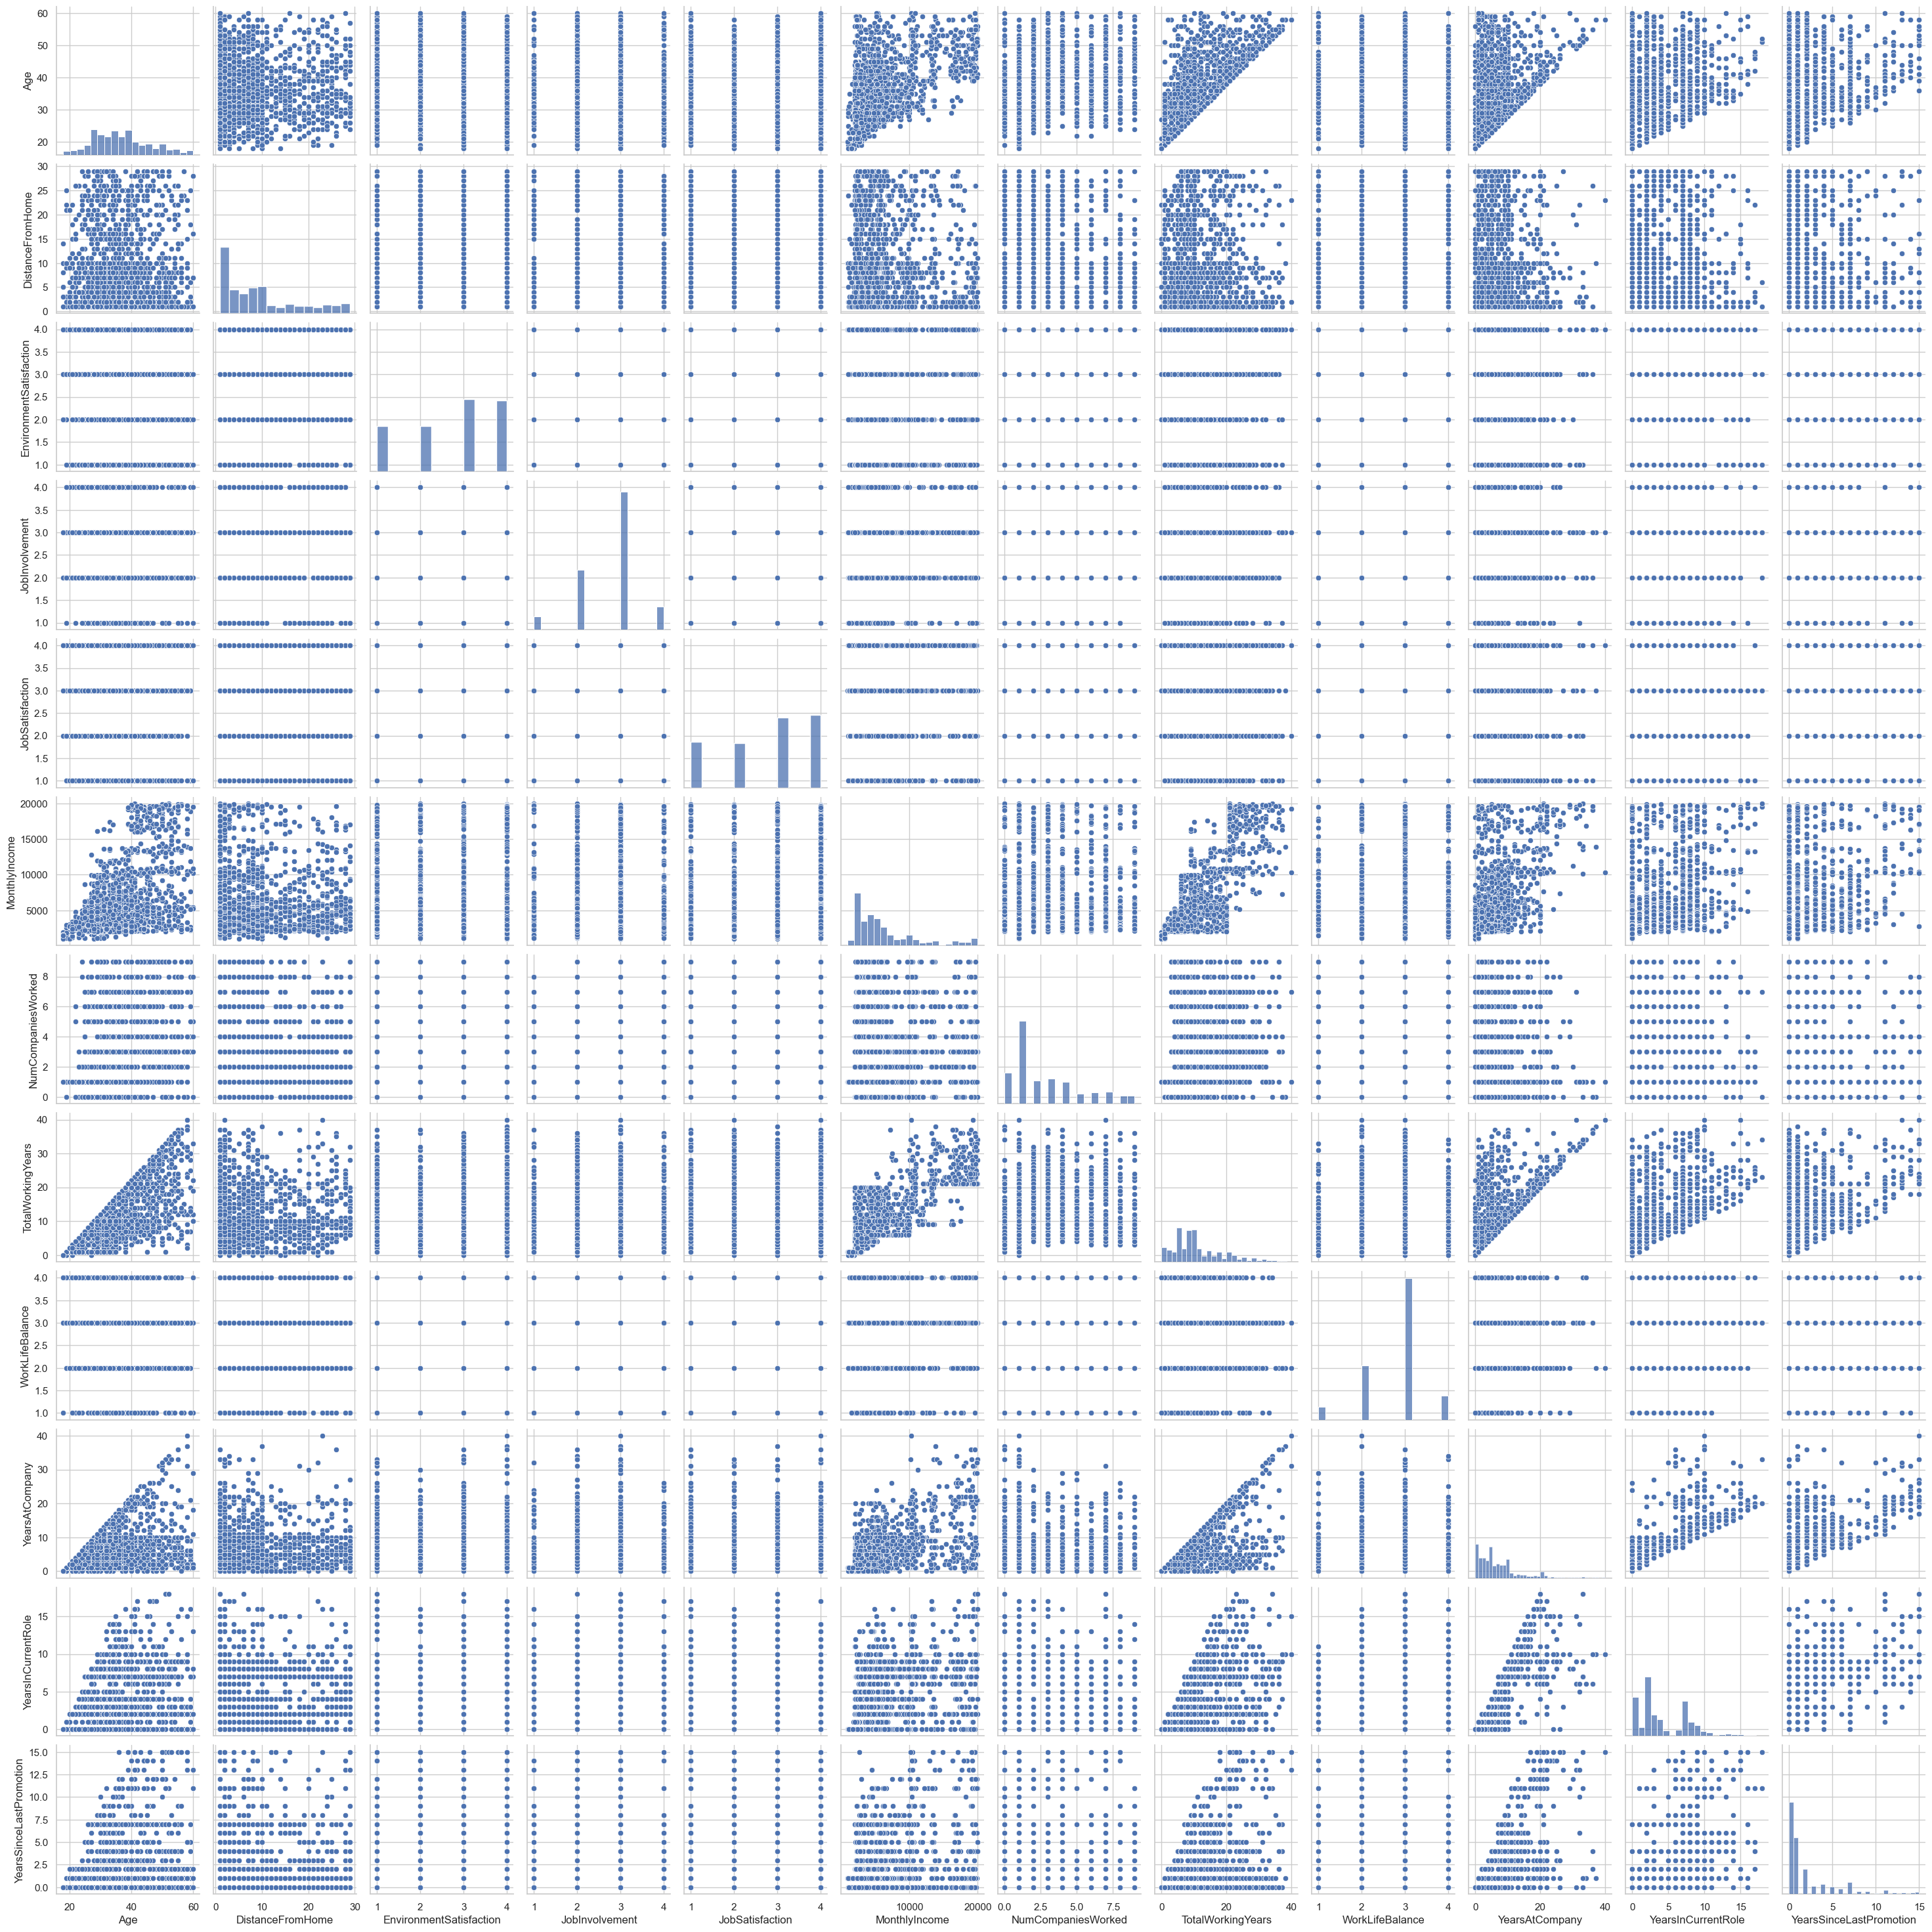

In [38]:
sns.pairplot(new_data)

## Data Transformation

In [39]:
df1=data.select_dtypes(include="object")
df1

Attrition     BusinessTravel              Department EducationField  \
0          Yes      Travel_Rarely                   Sales  Life Sciences   
1           No  Travel_Frequently  Research & Development  Life Sciences   
2          Yes      Travel_Rarely  Research & Development          Other   
3           No  Travel_Frequently  Research & Development  Life Sciences   
4           No      Travel_Rarely  Research & Development        Medical   
...        ...                ...                     ...            ...   
1465        No  Travel_Frequently  Research & Development        Medical   
1466        No      Travel_Rarely  Research & Development        Medical   
1467        No      Travel_Rarely  Research & Development  Life Sciences   
1468        No  Travel_Frequently                   Sales        Medical   
1469        No      Travel_Rarely  Research & Development        Medical   

      Gender                    JobRole MaritalStatus Over18 OverTime  
0     Female            Sales Executive        Single      Y      Yes  
1       Male         Research Scientist       Married      Y       No  
2       Male      Laboratory Technician        Single      Y      Yes  
3     Female         Research Scientist       Married      Y      Yes  
4       Male      Laboratory Technician       Married      Y       No  
...      ...                        ...           ...    ...      ...  
1465    Male      Laboratory Technician       Married      Y       No  
1466    Male  Healthcare Representative       Married      Y       No  
1467    Male     Manufacturing Director       Married      Y      Yes  
1468    Male            Sales Executive       Married      Y       No  
1469    Male      Laboratory Technician       Married      Y       No  

[1470 rows x 9 columns]

In [40]:
data["Department"].value_counts()

Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64

In [41]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Gender']=le.fit_transform(data['Gender'])
data['BusinessTravel']=le.fit_transform(data['BusinessTravel'])
data['MaritalStatus']=le.fit_transform(data['MaritalStatus'])
data['Over18']=le.fit_transform(data['Over18'])
data['OverTime']=le.fit_transform(data['OverTime'])
data['Department']=le.fit_transform(data['Department'])

In [42]:
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder()
data[['EducationField']] = encoder.fit_transform(data[['EducationField']])
data[['JobRole']] = encoder.fit_transform(data[['JobRole']])


In [43]:
data['Attrition']=le.fit_transform(data['Attrition'])


In [44]:
data

Age  Attrition  BusinessTravel  DailyRate  Department  DistanceFromHome  \
0      41          1               2       1102           2                 1   
1      49          0               1        279           1                 8   
2      37          1               2       1373           1                 2   
3      33          0               1       1392           1                 3   
4      27          0               2        591           1                 2   
...   ...        ...             ...        ...         ...               ...   
1465   36          0               1        884           1                23   
1466   39          0               2        613           1                 6   
1467   27          0               2        155           1                 4   
1468   49          0               1       1023           2                 2   
1469   34          0               2        628           1                 8   

      Education  EducationField  EmployeeCount  EmployeeNumber  ...  \
0             2             1.0              1               1  ...   
1             1             1.0              1               2  ...   
2             2             4.0              1               4  ...   
3             4             1.0              1               5  ...   
4             1             3.0              1               7  ...   
...         ...             ...            ...             ...  ...   
1465          2             3.0              1            2061  ...   
1466          1             3.0              1            2062  ...   
1467          3             1.0              1            2064  ...   
1468          3             3.0              1            2065  ...   
1469          3             3.0              1            2068  ...   

      RelationshipSatisfaction  StandardHours  StockOptionLevel  \
0                            1             80                 0   
1                            4             80                 1   
2                            2             80                 0   
3                            3             80                 0   
4                            4             80                 1   
...                        ...            ...               ...   
1465                         3             80                 1   
1466                         1             80                 1   
1467                         2             80                 1   
1468                         4             80                 0   
1469                         1             80                 0   

      TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  \
0                     8                      0                1   
1                    10                      3                3   
2                     7                      3                3   
3                     8                      3                3   
4                     6                      3                3   
...                 ...                    ...              ...   
1465                 17                      3                3   
1466                  9                      5                3   
1467                  6                      0                3   
1468                 17                      3                2   
1469                  6                      3                4   

      YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  \
0                  6                   4                        0   
1                 10                   7                        1   
2                  0                   0                        0   
3                  8                   7                        3   
4                  2                   2                        2   
...              ...                 ...                      ...   
1465               5                   2                        0   
1466              

In [45]:
data.select_dtypes(include="object")

Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]

[1470 rows x 0 columns]

In [46]:
data.dtypes.value_counts()


int64      26
int32       7
float64     2
Name: count, dtype: int64

In [47]:
data.shape

(1470, 35)

### Feature engineering

In [48]:
data.corr()

Age  Attrition  BusinessTravel  DailyRate  \
Age                       1.000000  -0.159205        0.024751   0.010661   
Attrition                -0.159205   1.000000        0.000074  -0.056652   
BusinessTravel            0.024751   0.000074        1.000000  -0.004086   
DailyRate                 0.010661  -0.056652       -0.004086   1.000000   
Department               -0.031882   0.063991       -0.009044   0.007109   
DistanceFromHome         -0.001686   0.077924       -0.024469  -0.004985   
Education                 0.208034  -0.031373        0.000757  -0.016806   
EducationField           -0.040873   0.026846        0.023724   0.037709   
EmployeeCount                  NaN        NaN             NaN        NaN   
EmployeeNumber           -0.010145  -0.010577       -0.015578  -0.050990   
EnvironmentSatisfaction   0.010146  -0.103369        0.004174   0.018355   
Gender                   -0.036311   0.029453       -0.032981  -0.011716   
HourlyRate                0.024287  -0.006846        0.026528   0.023381   
JobInvolvement            0.029820  -0.130016        0.039062   0.046135   
JobLevel                  0.509604  -0.169105        0.019311   0.002966   
JobRole                  -0.122427   0.067151        0.002724  -0.009472   
JobSatisfaction          -0.004892  -0.103481       -0.033962   0.030571   
MaritalStatus            -0.095029   0.162070        0.024001  -0.069586   
MonthlyIncome             0.497855  -0.159840        0.034319   0.007707   
MonthlyRate               0.028051   0.015170       -0.014107  -0.032182   
NumCompaniesWorked        0.299635   0.043494        0.020875   0.038153   
Over18                         NaN        NaN             NaN        NaN   
OverTime                  0.028062   0.246118        0.016543   0.009135   
PercentSalaryHike         0.003634  -0.013478       -0.029377   0.022704   
PerformanceRating         0.001904   0.002889       -0.026341   0.000473   
RelationshipSatisfaction  0.053535  -0.045872       -0.035986   0.007846   
StandardHours                  NaN        NaN             NaN        NaN   
StockOptionLevel          0.037510  -0.137145       -0.016727   0.042143   
TotalWorkingYears         0.680381  -0.171063        0.034226   0.014515   
TrainingTimesLastYear    -0.019621  -0.059478        0.015240   0.002453   
WorkLifeBalance          -0.021490  -0.063939       -0.011256  -0.037848   
YearsAtCompany            0.311309  -0.134392       -0.014575  -0.034055   
YearsInCurrentRole        0.212901  -0.160545       -0.011497   0.009932   
YearsSinceLastPromotion   0.216513  -0.033019       -0.032591  -0.033229   
YearsWithCurrManager      0.202089  -0.156199       -0.022636  -0.026363   

                          Department  DistanceFromHome  Education  \
Age                        -0.031882         -0.001686   0.208034   
Attrition                   0.063991          0.077924  -0.031373   
BusinessTravel             -0.009044         -0.024469   0.000757   
DailyRate                   0.007109         -0.004985  -0.016806   
Department                  1.000000          0.017225   0.007996   
DistanceFromHome            0.017225          1.000000   0.021042   
Education                   0.007996          0.021042   1.000000   
EducationField              0.013720          0.002013  -0.039592   
EmployeeCount                    NaN               NaN        NaN   
EmployeeNumber             -0.010895          0.032916   0.042070   
EnvironmentSatisfaction    -0.019395         -0.016075  -0.027128   
Gender                     -0.041583         -0.001851  -0.016547   
HourlyRate                 -0.004144          0.031131   0.016775   
JobInvolvement             -0.024586          0.008783   0.042438   
JobLevel                    0.101963          0.005303   0.101589   
JobRole                     0.662431         -0.001015   0.004236   
JobSatisfaction             0.021001         -0.003669  -0.011296   
MaritalStatus               0.056073         -0.0144

In [49]:
data.drop(['EmployeeCount','Over18',"StandardHours","EmployeeNumber"],axis=1, inplace=True)


In [50]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

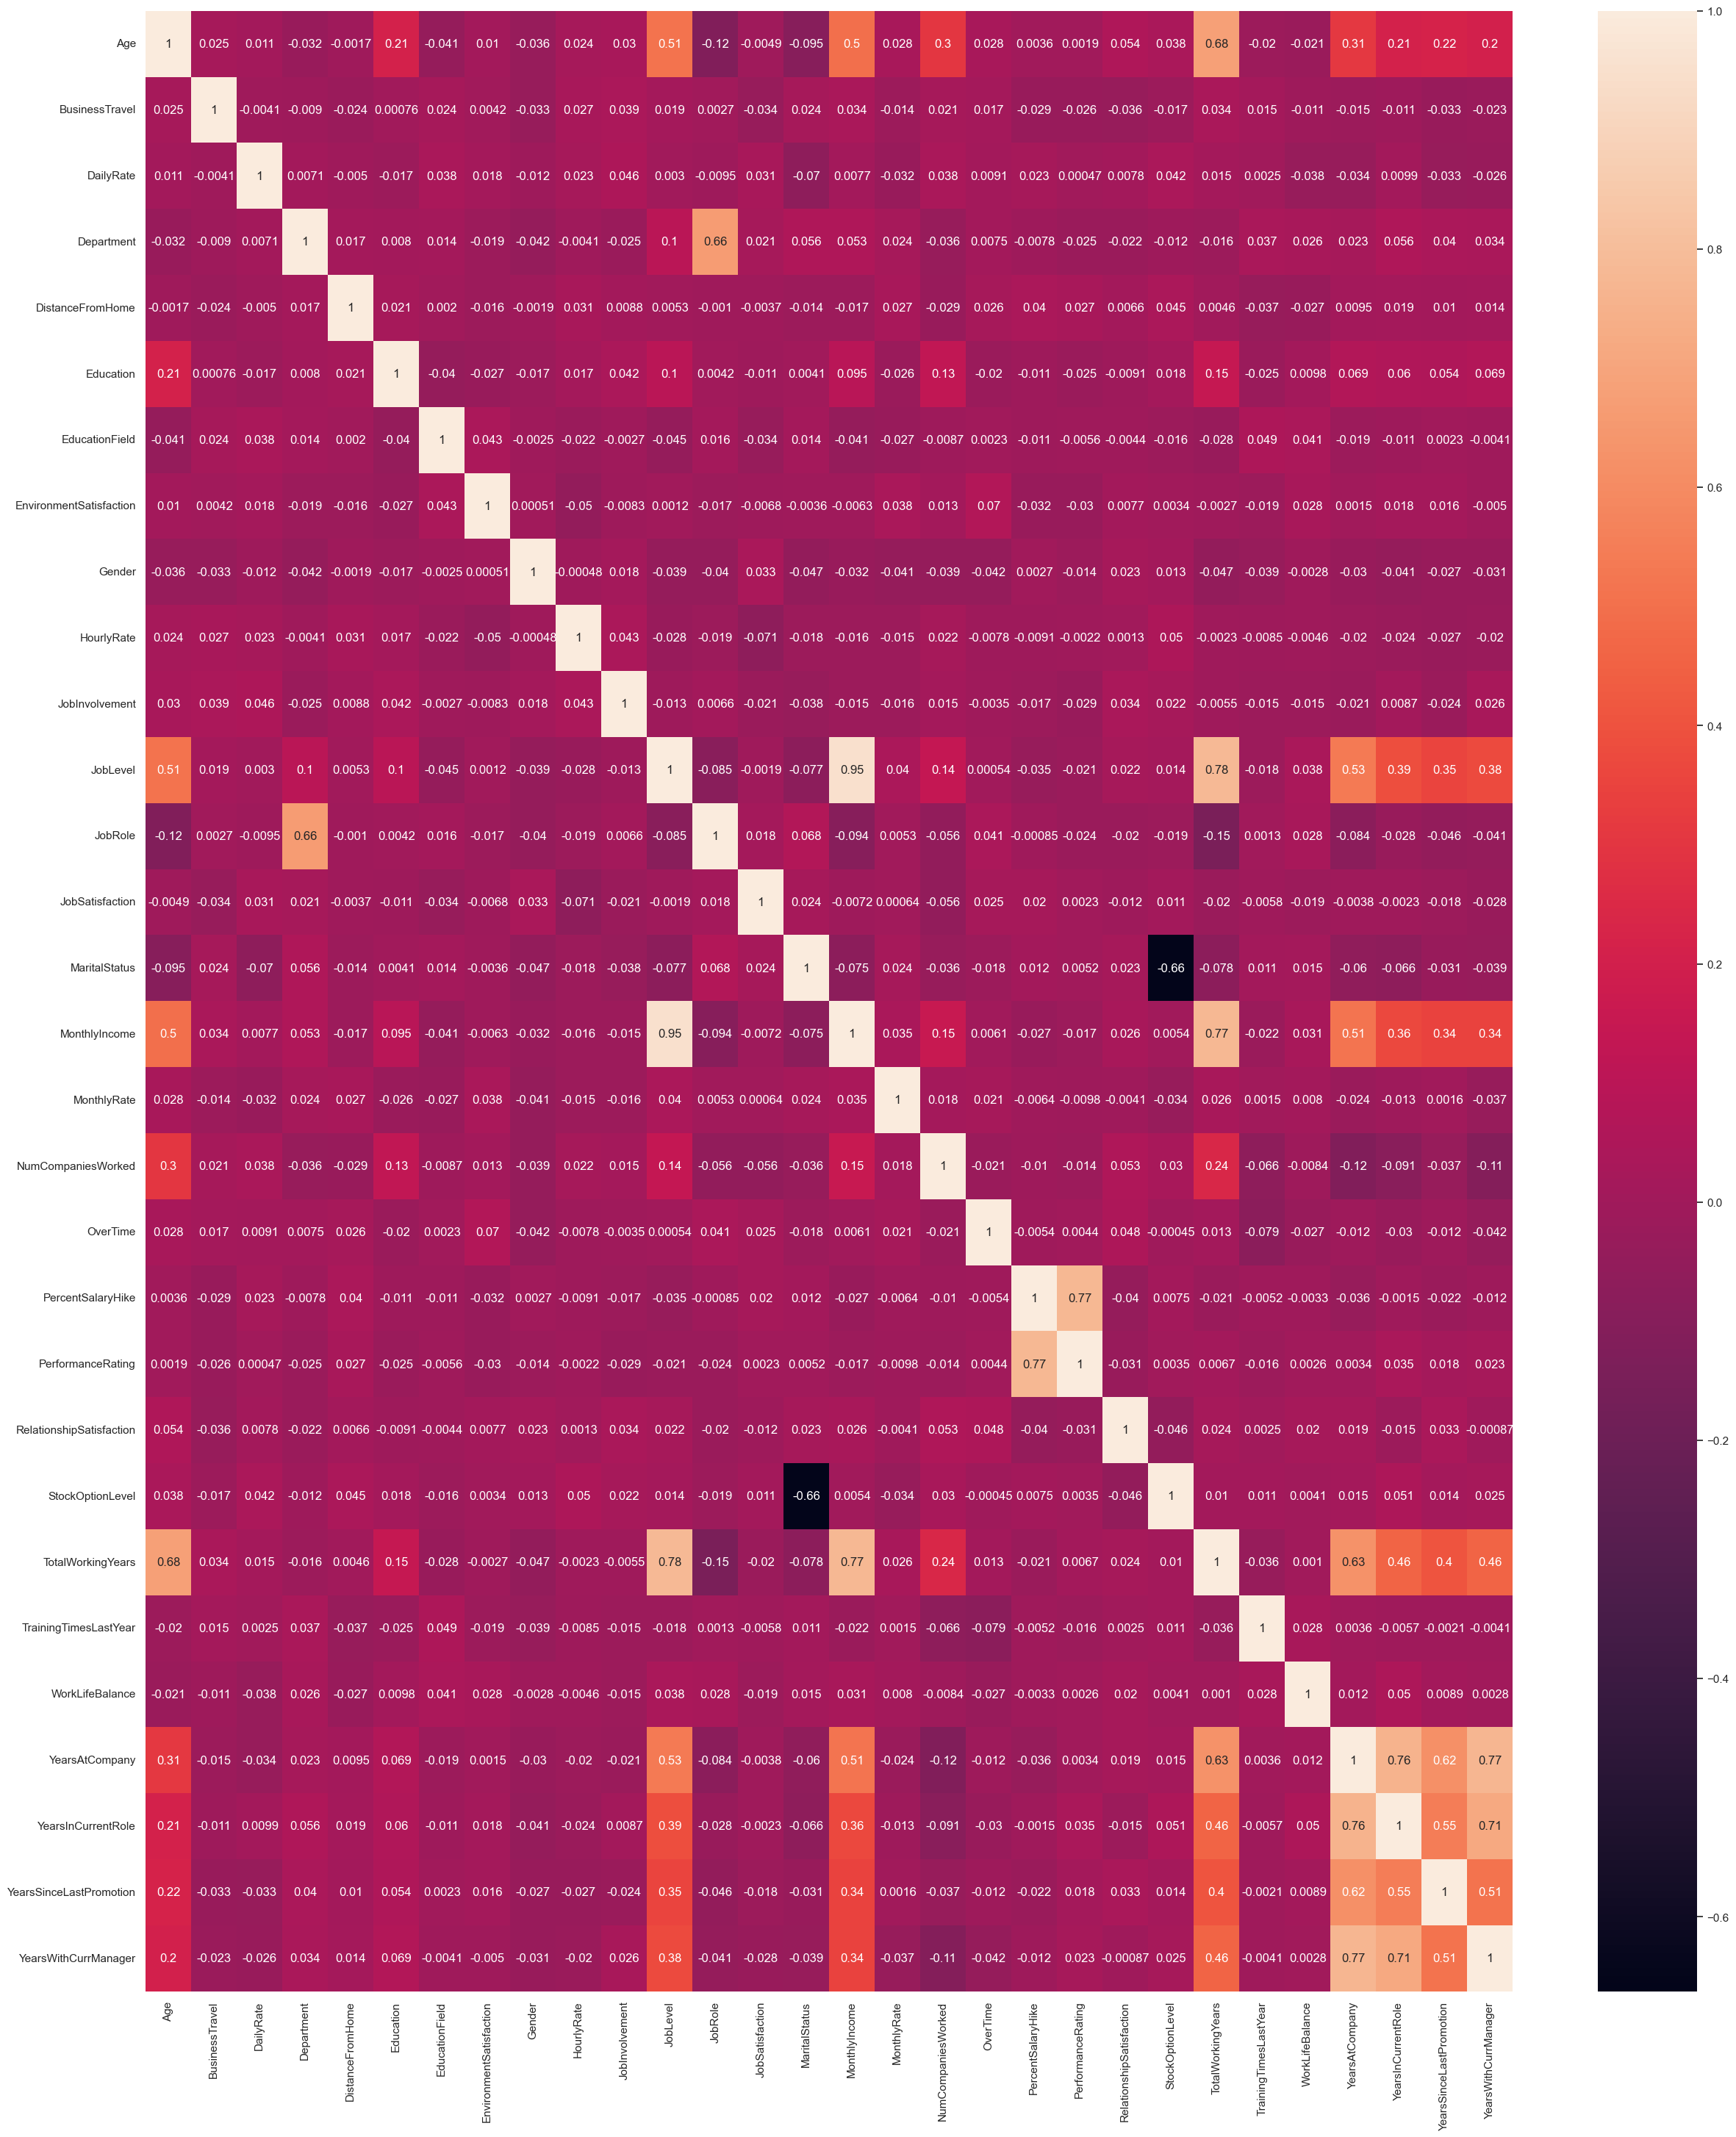

In [51]:
plt.figure(figsize=(30,35),facecolor='white')
sns.heatmap(data=data.drop(['Attrition'],axis=1).corr(),annot=True)
plt.show()

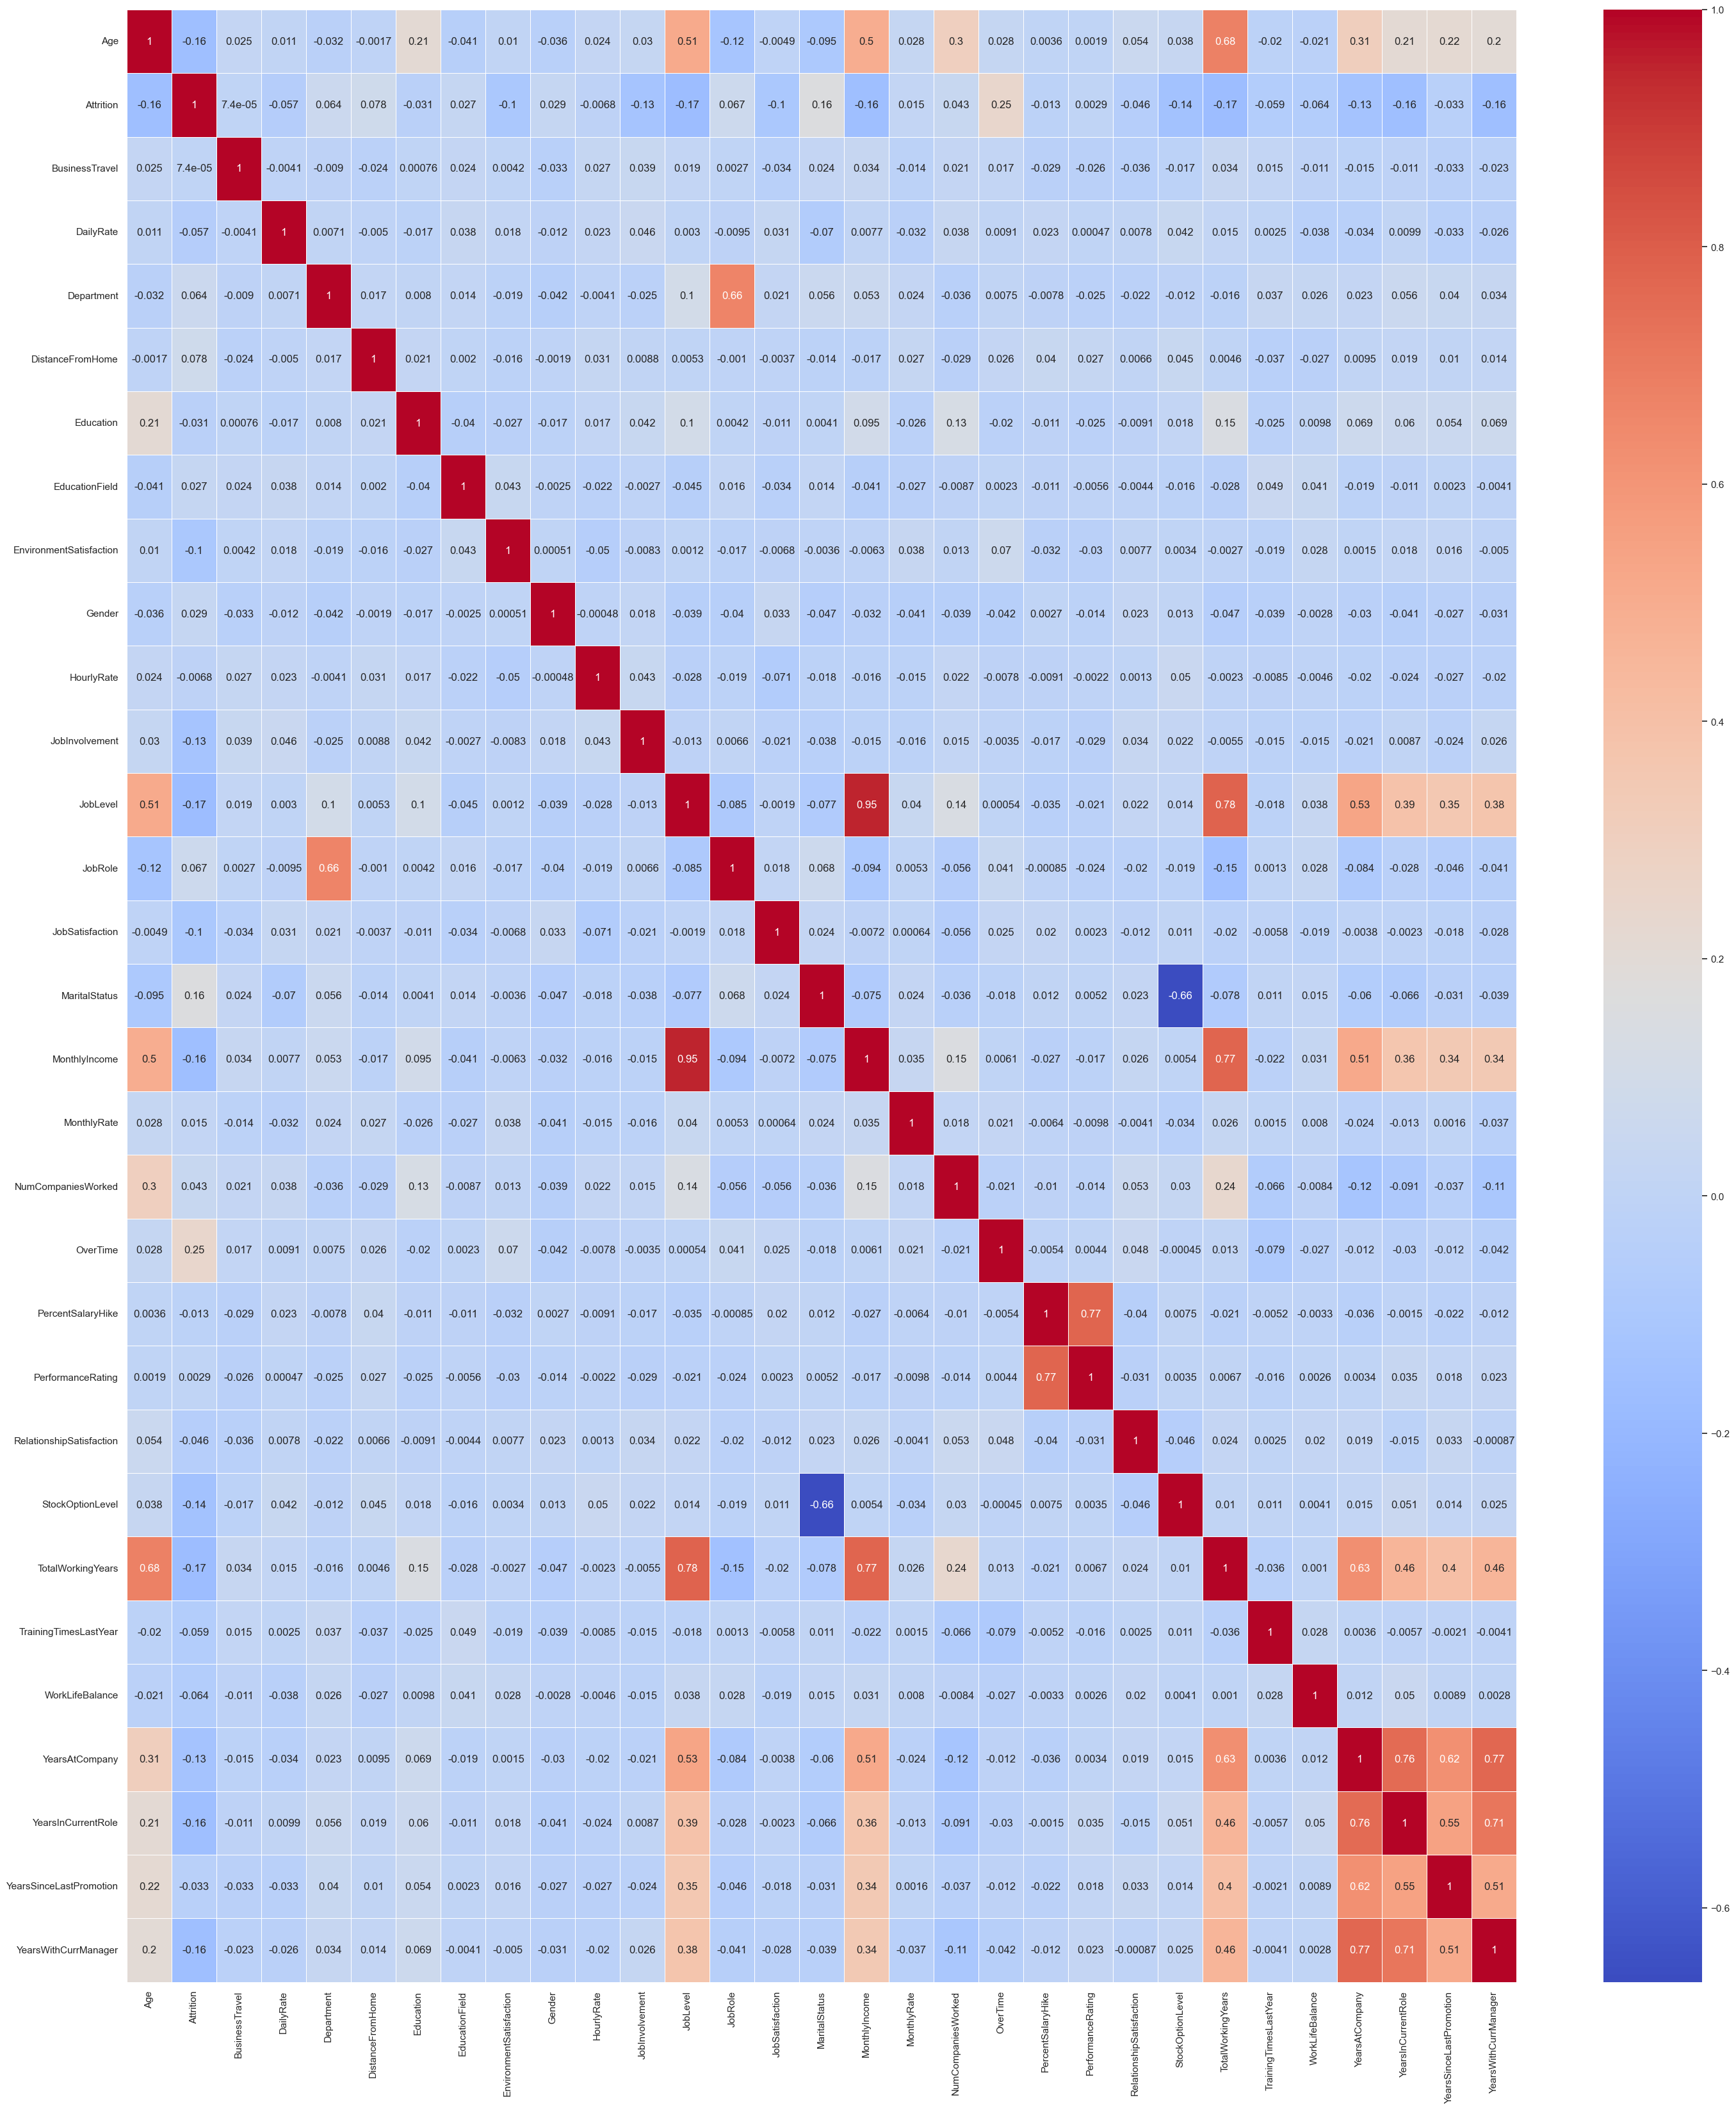

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(35, 40), facecolor='white')  # Set figure size and background color
sns.heatmap(data.corr(), annot=True, cmap="coolwarm", linewidths=0.5)  

plt.show()

## MODEL BULIDING 
- Split The Data X AND Y 

In [53]:
x=data.drop('Attrition',axis=1) # drops the entire column named "Price"
y=data.Attrition  # assigns the "Price" coumn to the variable y

In [54]:
x.shape

(1470, 30)

In [55]:
y.shape

(1470,)

## Split the data for training and testing

In [56]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

In [57]:
x_train.shape


(1029, 30)

In [58]:
x_test.shape

(441, 30)

In [59]:
# standard scaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled= scaler.fit_transform(x_train)
x_test_scaled= scaler.transform(x_test)
print(x_train_scaled)
x_train

[[ 1.41369115  0.59277912  0.79421172 ... -0.05899761 -0.36030992
  -0.28567748]
 [-0.09834647  0.59277912 -1.44072151 ... -0.60592139 -0.68214924
  -0.85372023]
 [-1.71838678  0.59277912 -1.14354907 ... -1.15284518 -0.36030992
  -1.13774161]
 ...
 [-1.61038409 -0.92079337  1.11348789 ... -1.15284518 -0.68214924
  -1.13774161]
 [-0.85436528  0.59277912  1.41311631 ... -0.3324595  -0.68214924
  -0.28567748]
 [ 1.41369115  0.59277912 -1.32283492 ... -1.15284518 -0.68214924
  -1.13774161]]


Age  BusinessTravel  DailyRate  Department  DistanceFromHome  Education  \
714    50               2       1126           1                 1          2   
135    36               2        216           1                 6          2   
1271   21               2        337           2                 7          1   
477    50               1       1246           0                 3          3   
806    52               2        994           1                 7          4   
...   ...             ...        ...         ...               ...        ...   
1130   35               2        750           1                28          3   
1294   41               2        447           1                 5          3   
860    22               1       1256           1                 3          4   
1459   29               2       1378           1                13          2   
1126   50               2        264           2                 9          3   

      EducationField  EnvironmentSatisfaction  Gender  HourlyRate  ...  \
714              3.0                        4       1          66  ...   
135              3.0                        2       1          84  ...   
1271             2.0                        2       1          31  ...   
477              3.0                        1       1          99  ...   
806              1.0                        2       1          87  ...   
...              ...                      ...     ...         ...  ...   
1130             1.0                        2       1          46  ...   
1294             1.0                        2       1          85  ...   
860              1.0                        3       1          48  ...   
1459             4.0                        4       1          46  ...   
1126             2.0                        3       1          59  ...   

      PerformanceRating  RelationshipSatisfaction  StockOptionLevel  \
714                   4                         3                 1   
135                   4                         4                 2   
1271                  3                         2                 0   
477                   3                         3                 1   
806                   3                         4                 0   
...                 ...                       ...               ...   
1130                  3                         4                 2   
1294                  3                         1                 0   
860                   3                         2                 1   
1459                  3                         1                 1   
1126                  3                         3                 1   

      TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  \
714                  32                      1                2   
135                   7                      0                3   
1271                  1                      3                3   
477                  32                      2                3   
806                  18                      4                3   
...                 ...                    ...              ...   
1130                 10                      3                2   
1294                 11                      3                1   
860                   1                      5                3   
1459                 10                      2                3   
1126                 27                      2                3   

      YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  \
714                5                   4                        1   
135                3                   2                        0   
1271               1                   0                        1   
477               32                   5                       10   
806                8                   6                        4   
...              ...                 ...                      ...   
113

In [60]:
from imblearn.over_sampling import SMOTE
# Before SMOTE
print("Before SMOTE:", y_train.value_counts())

# Create SMOTE instance
smote = SMOTE(random_state=42)

# Apply SMOTE to training data
x_train_smote, y_train_smote = smote.fit_resample(x_train_scaled, y_train)

# After SMOTE
print("After SMOTE:", y_train_smote.value_counts())


Before SMOTE: Attrition
0    853
1    176
Name: count, dtype: int64
After SMOTE: Attrition
0    853
1    853
Name: count, dtype: int64


In [61]:
# Before SMOTE
print("Before SMOTE:", y_train.value_counts())

# Create SMOTE instance
smote = SMOTE(random_state=42)

# Apply SMOTE to training data
X_train_smote, y_train_smote = smote.fit_resample(x_train_scaled, y_train)

# After SMOTE
print("After SMOTE:", y_train_smote.value_counts())


Before SMOTE: Attrition
0    853
1    176
Name: count, dtype: int64
After SMOTE: Attrition
0    853
1    853
Name: count, dtype: int64


In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report


#Create logisticRegression Instance
lr=LogisticRegression()
lr.fit(x_train_scaled,y_train)

#Accuracy on Train data
x_pred=lr.predict(x_train_scaled)
train_acc=accuracy_score(x_pred,y_train)
print("Accuracy on training data:",train_acc)

#Accuracy on test data
x_test_pred=lr.predict(x_test_scaled)

lr_acc=accuracy_score(x_test_pred,y_test)
print("--------------------------------------")
print("The Accuracy of the LogisticRegression is:",lr_acc)
print(confusion_matrix(y_test, x_test_pred))
print(classification_report(y_test,x_test_pred))

Accuracy on training data: 0.8736637512147716
--------------------------------------
The Accuracy of the LogisticRegression is: 0.8662131519274376
[[367  13]
 [ 46  15]]
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       380
           1       0.54      0.25      0.34        61

    accuracy                           0.87       441
   macro avg       0.71      0.61      0.63       441
weighted avg       0.84      0.87      0.84       441



### Hyperparameter Tuning (logistic regression)

In [63]:
# Hyperparameter Tuning for Logistic Regression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report,accuracy_score

# Define parameter grid for tuning
param_grid_lr = {"C": [0.01, 0.1, 1, 10, 100]}
grid_lr = GridSearchCV(LogisticRegression(max_iter=500), param_grid_lr, cv=5, n_jobs=-1)
grid_lr.fit(x_train_scaled,y_train)

# Get best parameters
best_lr = grid_lr.best_estimator_
print("Best Hyperparameters:", best_lr)

y_pred_best_lr = best_lr.predict(x_test_scaled)

tuned_lr_acc=accuracy_score(y_test, y_pred_best_lr)
print("The Accuracy of the LogisticRegression(tuned) is:",tuned_lr_acc)
print(confusion_matrix(y_test, y_pred_best_lr))
print(classification_report(y_test,y_pred_best_lr))

Best Hyperparameters: LogisticRegression(C=10, max_iter=500)
The Accuracy of the LogisticRegression(tuned) is: 0.8662131519274376
[[366  14]
 [ 45  16]]
              precision    recall  f1-score   support

           0       0.89      0.96      0.93       380
           1       0.53      0.26      0.35        61

    accuracy                           0.87       441
   macro avg       0.71      0.61      0.64       441
weighted avg       0.84      0.87      0.85       441



###  RandomForestClassifier

In [64]:
from sklearn.ensemble import RandomForestClassifier

#Create Randomforestclassifier Instance
rf_clf=RandomForestClassifier()
rf_clf.fit(x_train_scaled,y_train)

y_pred_rf=rf_clf.predict(x_test_scaled)
rf_clf_acc=accuracy_score(y_test,y_pred_rf)
print("Accuracy of the RandomForestClassifier is:",rf_clf_acc)
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test,y_pred_rf))

Accuracy of the RandomForestClassifier is: 0.8662131519274376
[[376   4]
 [ 55   6]]
              precision    recall  f1-score   support

           0       0.87      0.99      0.93       380
           1       0.60      0.10      0.17        61

    accuracy                           0.87       441
   macro avg       0.74      0.54      0.55       441
weighted avg       0.83      0.87      0.82       441



## hyperparameter turning (randomforestclassifier)

In [65]:
 #Hyperparameter Tuning for RandomForestClassifier

# Define parameter grid for tuning
param_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

rf_cv = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, n_jobs=-1, verbose=2)
rf_cv.fit(x_train_scaled,y_train)

# Best parameters
rf_best_params =rf_cv.best_params_
print("Best Parameters:",rf_cv.best_params_)

y_predict=rf_cv.predict(x_test_scaled)
tuned_rf_clf_acc=accuracy_score(y_test,y_predict)
print("Accuracy of the RandomForestClassifier(tuned) is:",tuned_rf_clf_acc)
print(confusion_matrix(y_test, y_predict))
print(classification_report(y_test,y_predict))

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Accuracy of the RandomForestClassifier(tuned) is: 0.8639455782312925
[[376   4]
 [ 56   5]]
              precision    recall  f1-score   support

           0       0.87      0.99      0.93       380
           1       0.56      0.08      0.14        61

    accuracy                           0.86       441
   macro avg       0.71      0.54      0.53       441
weighted avg       0.83      0.86      0.82       441



## support vector machine

In [66]:
from sklearn.svm import SVC

#Create SupportVectorClassifier Instance
svc = SVC()
svc.fit(x_train_scaled, y_train)

y_pred_svc = svc.predict(x_test_scaled)
svc_acc=accuracy_score(y_test,y_pred_svc)
print("Accuracy of the SVC is:",svc_acc)
print(confusion_matrix(y_test, y_pred_svc))
print(classification_report(y_test,y_pred_svc))

Accuracy of the SVC is: 0.8752834467120182
[[379   1]
 [ 54   7]]
              precision    recall  f1-score   support

           0       0.88      1.00      0.93       380
           1       0.88      0.11      0.20        61

    accuracy                           0.88       441
   macro avg       0.88      0.56      0.57       441
weighted avg       0.88      0.88      0.83       441



## hyperparameter ("SVM")

In [67]:
# Define parameter grid for tuning
param_grid_svm = {"C": [0.1, 1, 10], "kernel": ["linear", "rbf"]}
grid_svm = GridSearchCV(SVC(), param_grid_svm, cv=5, n_jobs=-1)
grid_svm.fit(x_train_scaled, y_train)

# Best parameters
svc_best_params =grid_svm.best_params_
print("Best Parameters:",grid_svm.best_params_)

y_pred_best_svc= grid_svm.predict(x_test_scaled)
tuned_svc_acc=accuracy_score(y_test,y_pred_best_svc)
print("Accuracy of the SVC(tuned) is:",tuned_svc_acc)
print(confusion_matrix(y_test, y_pred_best_svc))
print(classification_report(y_test,y_pred_best_svc))

Best Parameters: {'C': 0.1, 'kernel': 'linear'}
Accuracy of the SVC(tuned) is: 0.8775510204081632
[[375   5]
 [ 49  12]]
              precision    recall  f1-score   support

           0       0.88      0.99      0.93       380
           1       0.71      0.20      0.31        61

    accuracy                           0.88       441
   macro avg       0.80      0.59      0.62       441
weighted avg       0.86      0.88      0.85       441



###  GradientBoostingClassifier

In [68]:
from sklearn.ensemble import GradientBoostingClassifier

#Create GradientBoostingClassifier Instance
gbc = GradientBoostingClassifier()
gbc.fit(x_train,y_train)

y_pred_gbc = gbc.predict(x_test)
gbc_acc=accuracy_score(y_test,y_pred_gbc)
print("Accuracy Score of Gradient Boosting classifier is",gbc_acc)
print(confusion_matrix(y_test, y_pred_gbc))
print(classification_report(y_test,y_pred_gbc))

Accuracy Score of Gradient Boosting classifier is 0.8775510204081632
[[370  10]
 [ 44  17]]
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       380
           1       0.63      0.28      0.39        61

    accuracy                           0.88       441
   macro avg       0.76      0.63      0.66       441
weighted avg       0.86      0.88      0.86       441



## Hyperparameter(GradientBoostingClassifier)

In [69]:
# Define parameter grid for tuning
param_grid_gbc = {"n_estimators": [50, 100, 200], "learning_rate": [0.01, 0.1, 0.2]}
grid_gbc = GridSearchCV(GradientBoostingClassifier(), param_grid_gbc, cv=5, n_jobs=-1)
grid_gbc.fit(x_train_scaled, y_train)

# Best parameters
gbc_best_params =grid_gbc.best_params_
print("Best Parameters:",grid_gbc.best_params_)

y_pred_best_gbc = grid_gbc.predict(x_test_scaled)
tuned_gbc_acc=accuracy_score(y_test,y_pred_best_gbc)
print("Accuracy Score of Gradient Boosting classifier(tuned) is",tuned_gbc_acc)
print(confusion_matrix(y_test, y_pred_best_gbc))
print(classification_report(y_test,y_pred_best_gbc))

Best Parameters: {'learning_rate': 0.2, 'n_estimators': 50}
Accuracy Score of Gradient Boosting classifier(tuned) is 0.8752834467120182
[[368  12]
 [ 43  18]]
              precision    recall  f1-score   support

           0       0.90      0.97      0.93       380
           1       0.60      0.30      0.40        61

    accuracy                           0.88       441
   macro avg       0.75      0.63      0.66       441
weighted avg       0.85      0.88      0.86       441



###  KNeighborsClassifier

In [70]:
from sklearn.neighbors import KNeighborsClassifier
#Create KNeighborsClassifier Instance
knn = KNeighborsClassifier()
knn.fit(x_train_scaled, y_train)

y_pred_knn = knn.predict(x_test_scaled)
knn_acc=accuracy_score(y_test,y_pred_knn)
print("accuracy_score",knn_acc)
print(confusion_matrix(y_test, y_pred_knn ))
print(classification_report(y_test,y_pred_knn))


accuracy_score 0.8662131519274376
[[375   5]
 [ 54   7]]
              precision    recall  f1-score   support

           0       0.87      0.99      0.93       380
           1       0.58      0.11      0.19        61

    accuracy                           0.87       441
   macro avg       0.73      0.55      0.56       441
weighted avg       0.83      0.87      0.83       441



##  Hyperparameter (KNeighborsClassifier)

In [71]:
# Define parameter grid for tuning
param_grid_knn = {"n_neighbors": [3, 5, 7, 9], "weights":["uniform", "distance"]}
grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5, n_jobs=-1)
grid_knn.fit(x_train_scaled, y_train)

# Best parameters
knn_best_params =grid_knn.best_params_
print("Best Parameters:",grid_knn.best_params_)

y_pred_best_knn = grid_knn.predict(x_test_scaled)
tuned_knn_acc=accuracy_score(y_test,y_pred_best_knn)
tuned_knn_acc
print("accuracy_score",tuned_knn_acc)
print(confusion_matrix(y_test, y_pred_best_knn ))
print(classification_report(y_test,y_pred_best_knn))

Best Parameters: {'n_neighbors': 9, 'weights': 'distance'}
accuracy_score 0.873015873015873
[[380   0]
 [ 56   5]]
              precision    recall  f1-score   support

           0       0.87      1.00      0.93       380
           1       1.00      0.08      0.15        61

    accuracy                           0.87       441
   macro avg       0.94      0.54      0.54       441
weighted avg       0.89      0.87      0.82       441



##  Artificial Neural Network

In [72]:
# Training the model
from sklearn.neural_network import MLPClassifier
model_mlp = MLPClassifier(hidden_layer_sizes=(100,100,100),batch_size=10,learning_rate_init=0.01,max_iter=2000,random_state=10)
model_mlp.fit(x_train_scaled,y_train)

MLPClassifier(batch_size=10, hidden_layer_sizes=(100, 100, 100),
              learning_rate_init=0.01, max_iter=2000, random_state=10)

In [76]:
# Predicting the model
y_predict_mlp = model_mlp.predict(x_test)
# Finding accuracy, precision, recall and confusion matrix
ANN=accuracy_score(y_test,y_predict_mlp)
ANN
print(classification_report(y_test,y_predict_mlp))


              precision    recall  f1-score   support

           0       0.86      1.00      0.93       380
           1       0.00      0.00      0.00        61

    accuracy                           0.86       441
   macro avg       0.43      0.50      0.46       441
weighted avg       0.74      0.86      0.80       441



In [77]:
models=pd.DataFrame({"Model" : ["LogisticRegression","Hyperparameter LogisticRegression", "RandomForestClassifier","Hyperparameters RandomForestClassifier","SupportVectorClassifier","Hyperparameters SupportVectorClassifier",
                                "GradientBoostingCLassifier","Hyperparameters GradientBoostingCLassifier","KNeiborsClassifier","Hyperparameters KNeiborsClassifier","Artificial Neural Network"],
                               "Accuracy Score" : [lr_acc,tuned_lr_acc,rf_clf_acc,tuned_rf_clf_acc,svc_acc,tuned_svc_acc,
                                        gbc_acc,tuned_gbc_acc,knn_acc,tuned_knn_acc,ANN]})
models

Model  Accuracy Score
0                           LogisticRegression        0.866213
1            Hyperparameter LogisticRegression        0.866213
2                       RandomForestClassifier        0.866213
3       Hyperparameters RandomForestClassifier        0.863946
4                      SupportVectorClassifier        0.875283
5      Hyperparameters SupportVectorClassifier        0.877551
6                   GradientBoostingCLassifier        0.877551
7   Hyperparameters GradientBoostingCLassifier        0.875283
8                           KNeiborsClassifier        0.866213
9           Hyperparameters KNeiborsClassifier        0.873016
10                   Artificial Neural Network        0.861678

## Conclusion:
- Among all the models tested, the GradientBoostingClassifier gave the best accuracy (88.20%) without tuning.
- Tuning improved performance slightly for SVM and KNN, but had little or no effect on others.

- This project successfully used HR data and machine learning to understand and predict employee attrition. The study found that employees are more likely to leave if they are not satisfied with their job, have few chances to grow, face long travel times to work, or feel they are not paid fairly. By using these insights, companies can take early action to support such employees. This helps reduce turnover, improve job satisfaction, and build a stronger, more stable workforce.